In [21]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm, skew 

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #限制浮点数保留3位小数

In [22]:
df = pd.read_csv('youtube-new/USvideos.csv') # 对youtube数据集中的USvidoes进行读取
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


# 数据摘要

标称属性

In [23]:
cols = ['category_id', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']  # 标称属性列表
for col in cols:
    print(df[col].value_counts())
    print('-' * 50)

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: category_id, dtype: int64
--------------------------------------------------
False    40316
True       633
Name: comments_disabled, dtype: int64
--------------------------------------------------
False    40780
True       169
Name: ratings_disabled, dtype: int64
--------------------------------------------------
False    40926
True        23
Name: video_error_or_removed, dtype: int64
--------------------------------------------------


数值属性

In [24]:
cols = ['views', 'likes', 'dislikes', 'comment_count']  # 数值属性列表
for col in cols:
    print(col)
    print("max:"+str(df[col].max()))
    print("min:"+str(df[col].min()))
    print("mean:"+str(df[col].mean()))
    print("median:"+str(df[col].median()))
    print("Q1:"+str(df[col].quantile(.25)))
    print("Q2:"+str(df[col].quantile(.5)))
    print("Q3:"+str(df[col].quantile(.75)))
    print("default_num:"+str(df[col].isnull().sum()))
    print('-' * 50)
  


views
max:225211923
min:549
mean:2360784.6382573447
median:681861.0
Q1:242329.0
Q2:681861.0
Q3:1823157.0
default_num:0
--------------------------------------------------
likes
max:5613827
min:0
mean:74266.7024347359
median:18091.0
Q1:5424.0
Q2:18091.0
Q3:55417.0
default_num:0
--------------------------------------------------
dislikes
max:1674420
min:0
mean:3711.400888910596
median:631.0
Q1:202.0
Q2:631.0
Q3:1938.0
default_num:0
--------------------------------------------------
comment_count
max:1361580
min:0
mean:8446.803682629612
median:1856.0
Q1:614.0
Q2:1856.0
Q3:5755.0
default_num:0
--------------------------------------------------


# 数据的可视化

views的直方图和盒图

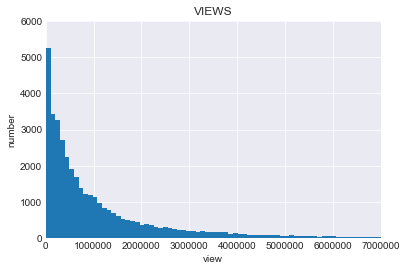

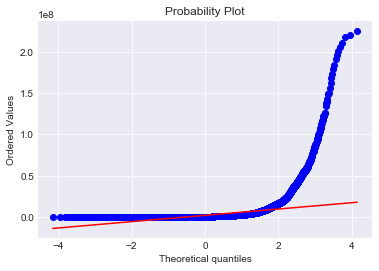

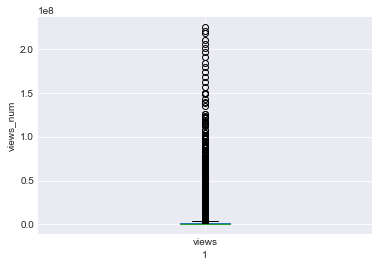

In [25]:
# row_num = df.iloc[:,0].size
# print(row_num) 

# 直方图
def draw_hist(myList,Title,Xlabel,Ylabel,Xmin,Xmax,Ymin,Ymax,bin_num):
      plt.hist(myList,bin_num) # 1000段
      plt.xlabel(Xlabel)
      plt.xlim(Xmin,Xmax)
      plt.ylabel(Ylabel)
      plt.ylim(Ymin,Ymax)
      plt.title(Title)
      plt.show()
draw_hist(df['views'], 'VIEWS', 'view', 'number', 0, 7000000, 0, 6000,2300 )

#Q-Q图
fig = plt.figure()
res = stats.probplot(df['views'], dist="norm", plot=plt)
plt.show()

# 盒图
df.boxplot(column=['views'])  
plt.ylabel("views_num")
plt.xlabel("1")  # 我们设置横纵坐标的标题。
plt.show()

plt.close()

views不服从正态分布

likes的直方图和盒图

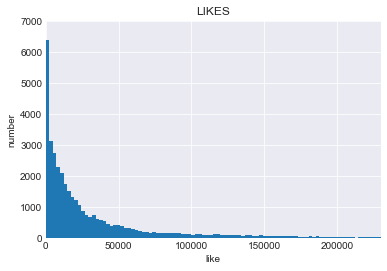

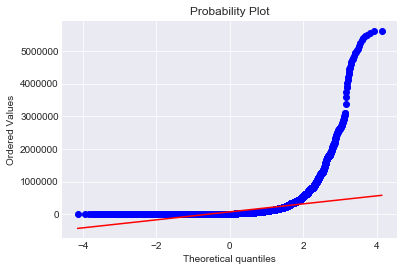

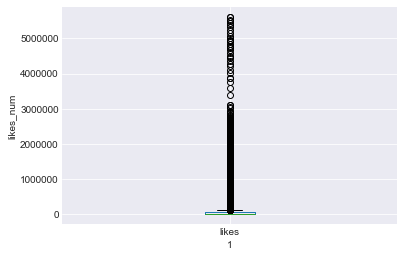

In [27]:
# 直方图
draw_hist(df['likes'], 'LIKES', 'like', 'number', 0, 230000, 0, 7000, 2300 )

#Q-Q图
fig = plt.figure()
res = stats.probplot(df['likes'], dist="norm", plot=plt)
plt.show()

# 盒图
df.boxplot(column=['likes'])  
plt.ylabel("likes_num")
plt.xlabel("1")  # 我们设置横纵坐标的标题。
plt.show()

plt.close()

likes不满足正太分布

In [ ]:
dislikes的直方图和盒图

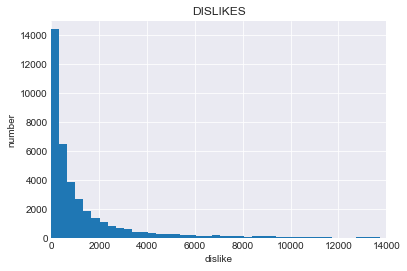

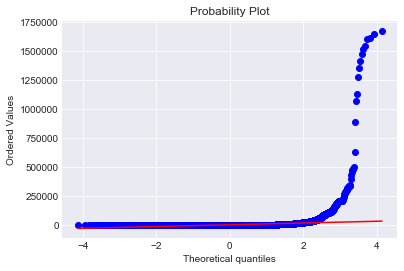

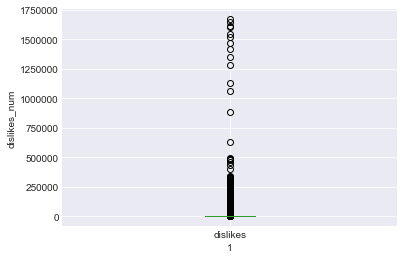

In [29]:
# 直方图
draw_hist(df['dislikes'], 'DISLIKES', 'dislike', 'number', 0, 14000, 0, 15000, 5000 )

#Q-Q图
fig = plt.figure()
res = stats.probplot(df['dislikes'], dist="norm", plot=plt)
plt.show()

# 盒图
df.boxplot(column=['dislikes'])  
plt.ylabel("dislikes_num")
plt.xlabel("1")  # 我们设置横纵坐标的标题。
plt.show()

plt.close()

dislikes 不满足正态分布

comment_count 的直方图和盒图

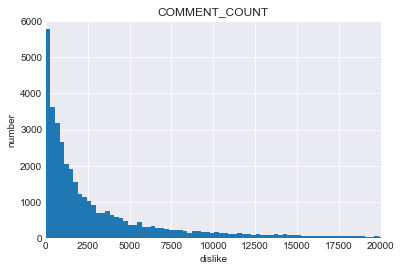

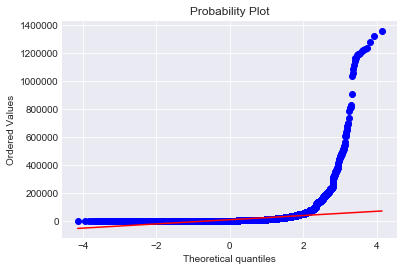

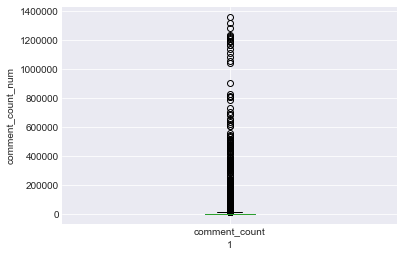

In [31]:
# 直方图
draw_hist(df['comment_count'], 'COMMENT_COUNT', 'dislike', 'number', 0, 20000, 0, 6000, 5000 )

#Q-Q图
fig = plt.figure()
res = stats.probplot(df['comment_count'], dist="norm", plot=plt)
plt.show()

# 盒图
df.boxplot(column=['comment_count'])  
plt.ylabel("comment_count_num")
plt.xlabel("1")  # 我们设置横纵坐标的标题。
plt.show()

plt.close()

comment_count不满足正太分布

由柱状图和QQ图可知，views，likes，dislikes，comment_count都不服从正态分布

# 数据缺失处理

In [32]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [ ]:
将缺失部分剔除

In [33]:
df_2 = df
df_2 = df_2.dropna(axis = 0)
df_2.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [ ]:
用最高频率值来填补缺失值

In [40]:
df_3 = df
df_3['description'] = df_3['description'].fillna('no description')
df_3.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

此时数据集已没有缺失数据